<a href="https://colab.research.google.com/github/Kanupriya83/Product-recommendation-system/blob/main/Product%20recommendation%20system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from datetime import datetime
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
from google.colab import files
uploaded = files.upload()

Saving online_retail.csv to online_retail.csv


In [5]:
df = pd.read_csv('online_retail.csv', encoding='utf-8', quotechar='"', on_bad_lines='skip', engine='python')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
# Count total lines in the original file (excluding header)
with open('online_retail.csv', encoding='utf-8') as f:
    total_lines = sum(1 for line in f) - 1  # subtract 1 for header

# Read the CSV with skipping bad lines
df = pd.read_csv('online_retail.csv', encoding='utf-8', quotechar='"', on_bad_lines='skip', engine='python')

# Number of skipped rows
skipped_rows = total_lines - len(df)

print(f"Total lines in file (excluding header): {total_lines}")
print(f"Rows successfully loaded: {len(df)}")
print(f"Rows skipped due to errors: {skipped_rows}")


Total lines in file (excluding header): 541909
Rows successfully loaded: 541909
Rows skipped due to errors: 0


In [8]:
for row in df:
  null_count=df[row].isnull().sum()
  print(row, " : ", null_count, ":", (null_count/len(df))*100)

InvoiceNo  :  0 : 0.0
StockCode  :  0 : 0.0
Description  :  1454 : 0.2683107311375157
Quantity  :  0 : 0.0
InvoiceDate  :  0 : 0.0
UnitPrice  :  0 : 0.0
CustomerID  :  135080 : 24.926694334288598
Country  :  0 : 0.0


In [9]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [10]:
# 1. Sort to ensure proper fill order
df = df.sort_values(by=['InvoiceNo', 'InvoiceDate'])

# 2. Group by InvoiceNo and InvoiceDate, and fill CustomerID within each group
df['CustomerID'] = df.groupby(['InvoiceNo', 'InvoiceDate'])['CustomerID'].ffill().bfill()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541717
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.2+ MB


In [12]:
df['CustomerID'].nunique()

4372

In [13]:
df.dropna(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541717
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   540455 non-null  float64       
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.1+ MB


In [15]:
df['CustomerID'].astype(int)

,CustomerID
0,17850
1,17850
2,17850
3,17850
4,17850
...,...
540449,14397
541541,15498
541715,15311
541716,17315


In [16]:
# Deleting duplicate entries
df.drop_duplicates(inplace=True)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 535187 entries, 0 to 541717
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535187 non-null  object        
 1   StockCode    535187 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     535187 non-null  int64         
 4   InvoiceDate  535187 non-null  datetime64[ns]
 5   UnitPrice    535187 non-null  float64       
 6   CustomerID   535187 non-null  float64       
 7   Country      535187 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.7+ MB


(535187, 8)

# Visualization

In [17]:
# Showing number of customers per country
customer_count=df['Country'].value_counts().reset_index()
customer_count.columns=['Country','Customer Count']
customer_count

,Country,Customer Count
0,United Kingdom,488846
1,Germany,9480
2,France,8541
3,EIRE,8184
4,Spain,2528
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1994
8,Portugal,1510
9,Australia,1258


In [18]:
fig = px.choropleth(customer_count,
                    locations="Country",
                    locationmode="country names",
                    color="Customer Count",
                    hover_name="Country",
                    color_continuous_scale="Viridis",
                    title="Number of Customers per Country")
fig.show()

In [19]:
df.groupby(['CustomerID','InvoiceNo','StockCode'])['Quantity'].sum()

CustomerID  InvoiceNo  StockCode
12346.0     541431     23166        74215
            C541433    23166       -74215
12347.0     537626     20780           12
                       20782            6
                       21064            6
                                    ...  
18287.0     570715     85039B          48
                       85173           48
            573167     21014           24
                       21824           48
                       23264           36
Name: Quantity, Length: 529771, dtype: int64

,InvoiceNo
CustomerID,
17841.0,7963
14096.0,7384
14911.0,6631
12748.0,5766
14606.0,3339
15311.0,3045
14156.0,2745
13089.0,2115
14646.0,2089


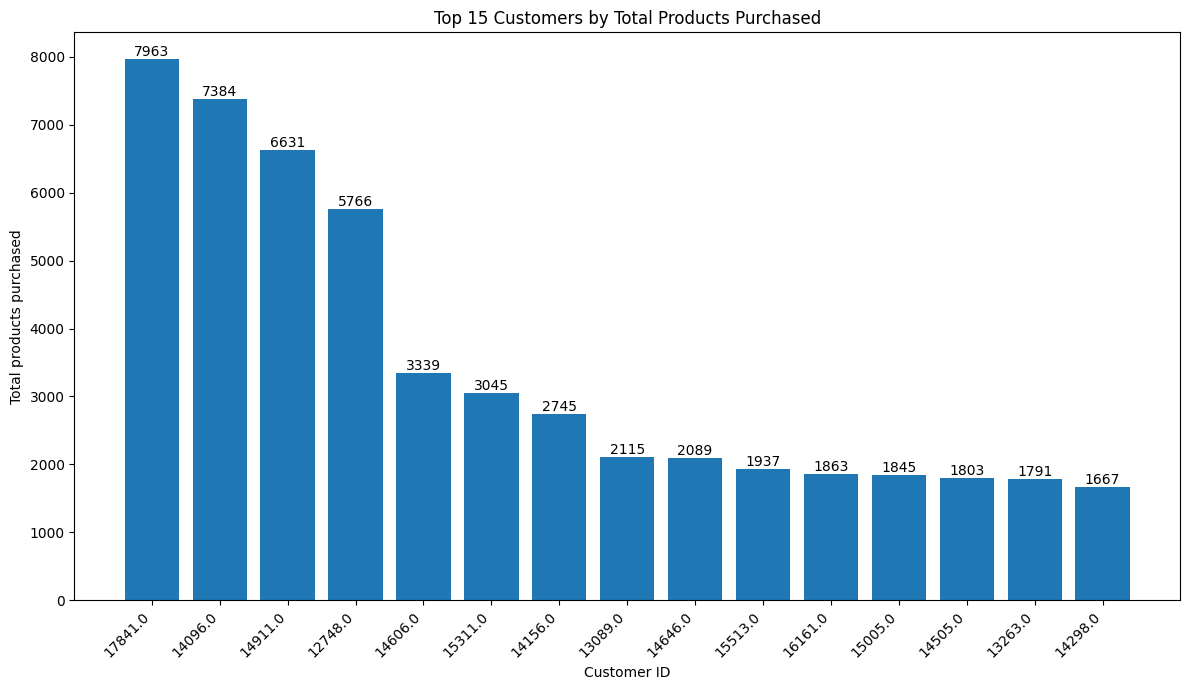

In [20]:
top_customers=df.groupby(['CustomerID'])['InvoiceNo'].count().sort_values(ascending=False).head(15)
display(top_customers)

plt.figure(figsize=(12, 7)) # Adjust figure size for better readability
plt.bar(top_customers.index.astype(str), top_customers.values) # Convert CustomerID to string for plotting
plt.xlabel('Customer ID')
plt.ylabel('Total products purchased')
plt.title('Top 15 Customers by Total Products Purchased')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

# Add value labels on top of the bars
for index, value in enumerate(top_customers.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout() # Adjust layout
plt.show()

## Analyze sales by country which countries contribute the most to sales - top 10


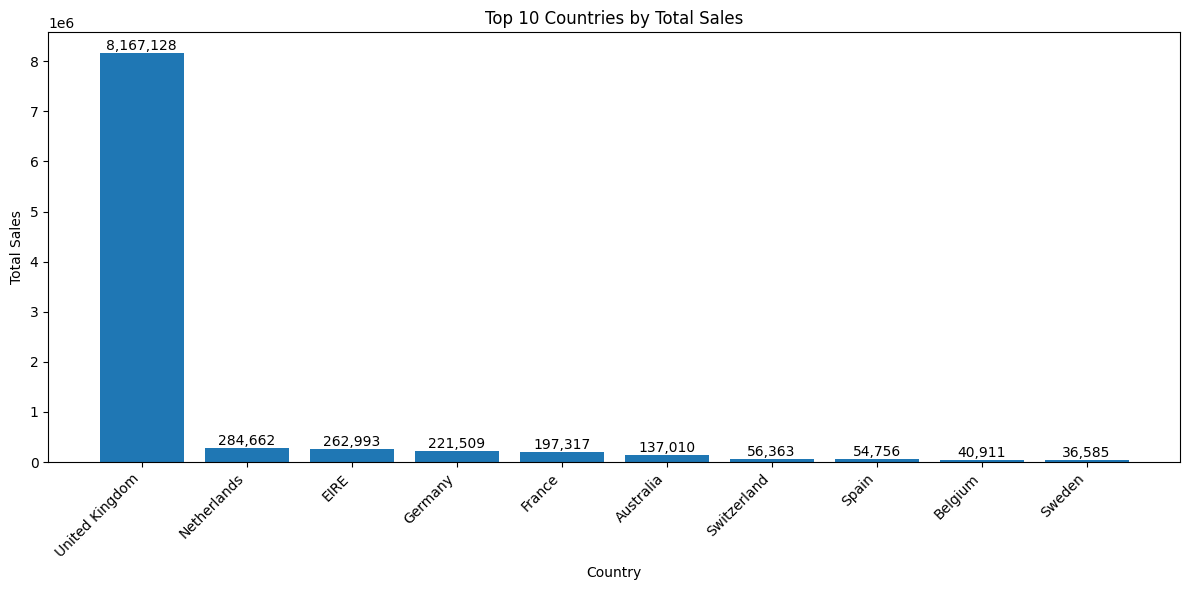

In [22]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(10) # Take top 10 as in the plot title
plt.figure(figsize=(12, 6))
plt.bar(country_sales.index, country_sales.values)
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Top 10 Countries by Total Sales')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

# Add value labels on top of the bars
for index, value in enumerate(country_sales.values):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom') # Format value for readability

plt.tight_layout() # Adjust layout
plt.show()

## Analyze sales by product - best selling product



In [21]:
product_sales = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False)
display(product_sales.head(10))

,TotalSales
Description,
DOTCOM POSTAGE,206245.48
REGENCY CAKESTAND 3 TIER,164459.49
WHITE HANGING HEART T-LIGHT HOLDER,99612.42
PARTY BUNTING,98243.88
JUMBO BAG RED RETROSPOT,92175.79
RABBIT NIGHT LIGHT,66661.63
POSTAGE,66230.64
PAPER CHAIN KIT 50'S CHRISTMAS,63715.24
ASSORTED COLOUR BIRD ORNAMENT,58792.42


## Analyze sales over time - trends in sales over months or years

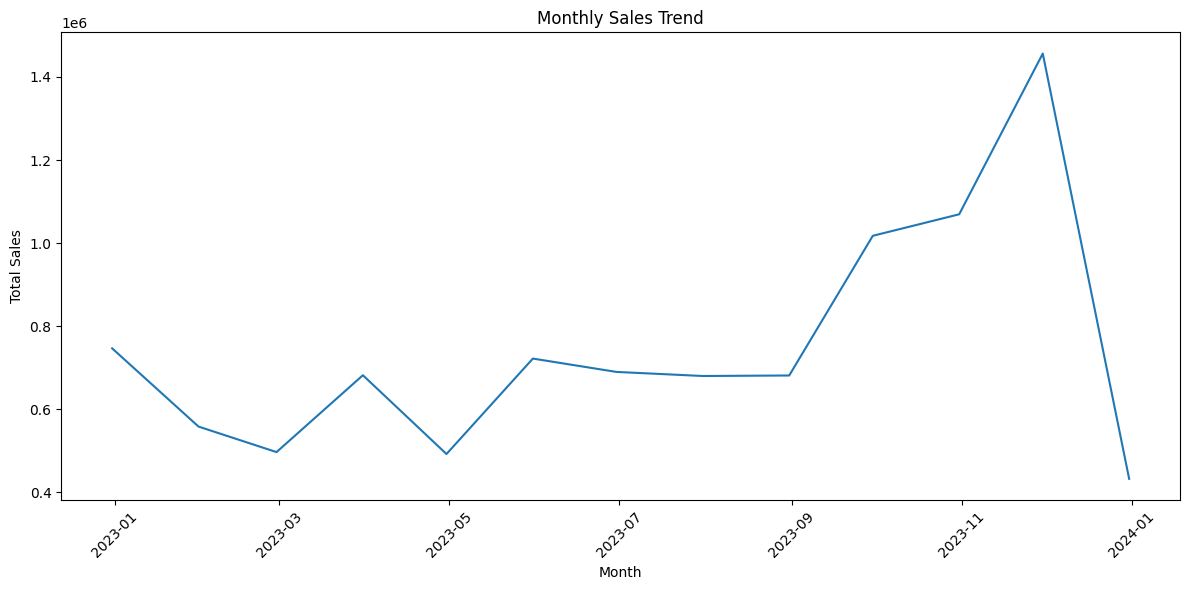

In [23]:
monthly_sales = df.set_index('InvoiceDate').resample('M')['TotalSales'].sum()
monthly_sales = monthly_sales.sort_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Customer segmentation - group customers based on their purchasing behavior (e.g., using RFM analysis).

### Recency, Frequency, and Monetary values for each customer


In [25]:
# Determine the most recent date in the dataset
latest_date = df['InvoiceDate'].max()

# Calculate Recency, Frequency, and Monetary values
rfm_df = df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda date: (latest_date - date.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('TotalSales', 'sum')
)

display(rfm_df.head())

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


Checking the distribution of the RFM values to identify potential outliers or skewed distributions before applying transformations.



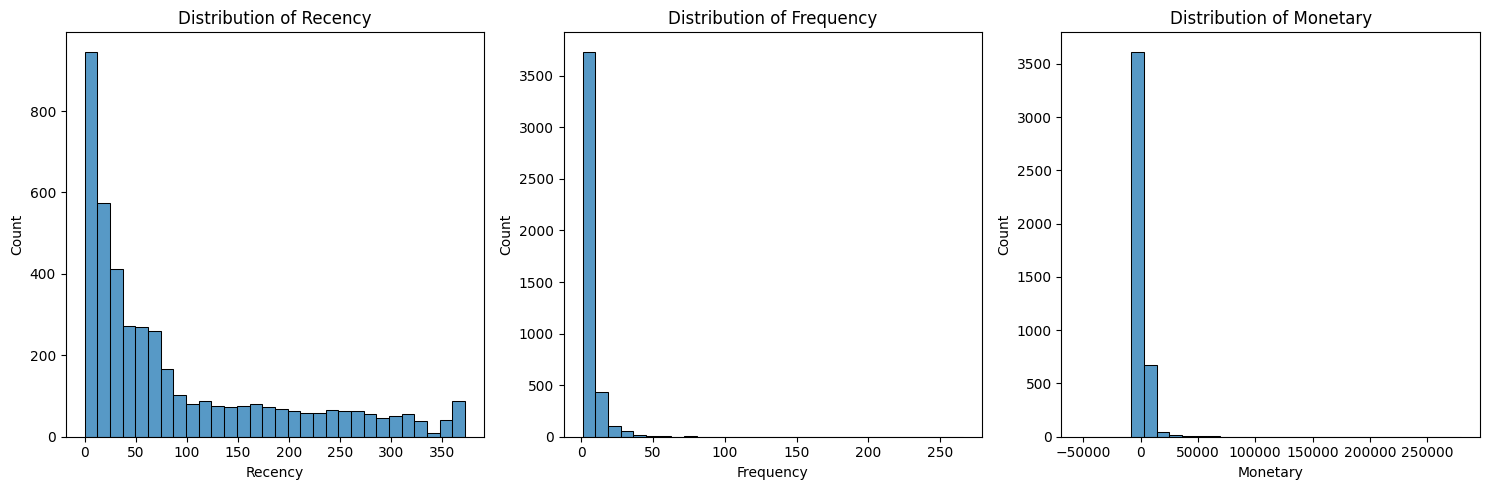

In [27]:
rfm_df.describe()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(rfm_df['Recency'], bins=30)
plt.title('Distribution of Recency')

plt.subplot(1, 3, 2)
sns.histplot(rfm_df['Frequency'], bins=30)
plt.title('Distribution of Frequency')

plt.subplot(1, 3, 3)
sns.histplot(rfm_df['Monetary'], bins=30)
plt.title('Distribution of Monetary')

plt.tight_layout()
plt.show()

Applying a cube root transformation to the Frequency and Monetary values to reduce skewness and handle outliers, which is suitable for right-skewed data with zero or negative values.



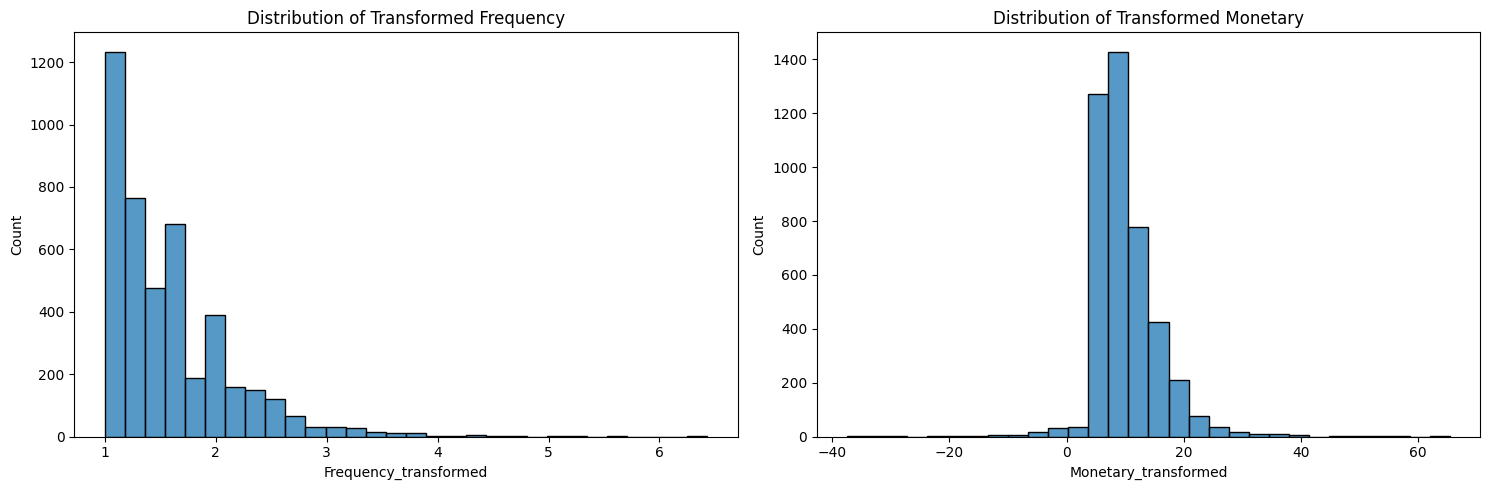

In [29]:
rfm_df['Frequency_transformed'] = np.cbrt(rfm_df['Frequency'])
rfm_df['Monetary_transformed'] = np.cbrt(rfm_df['Monetary'])

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(rfm_df['Frequency_transformed'], bins=30)
plt.title('Distribution of Transformed Frequency')

plt.subplot(1, 2, 2)
sns.histplot(rfm_df['Monetary_transformed'], bins=30)
plt.title('Distribution of Transformed Monetary')

plt.tight_layout()
plt.show()

Applying K-Means clustering to the transformed RFM data to segment customers and then add the cluster labels to the RFM DataFrame.



In [30]:
# Scale the transformed RFM data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency_transformed', 'Monetary_transformed']])

# Apply K-Means clustering (choose an arbitrary number of clusters for now)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

display(rfm_df.head())

,Recency,Frequency,Monetary,Frequency_transformed,Monetary_transformed,Cluster
CustomerID,,,,,,
12346.0,325,2,0.00,1.259921,0.000000,2
12347.0,1,7,4310.00,1.912931,16.273929,3
12348.0,74,4,1797.24,1.587401,12.158183,3
12349.0,18,1,1757.55,1.000000,12.068017,0
12350.0,309,1,334.40,1.000000,6.941001,2


Analyzing the characteristics of each customer segment based on their RFM values by grouping the RFM DataFrame by the 'Cluster' column and calculating the mean of each RFM metric for each cluster, then visualize the characteristics.



,Recency,Frequency,Monetary
Cluster,,,
0,53.013873,2.235849,483.264019
1,15.649306,29.819444,17352.599896
2,255.288170,1.772497,414.236685
3,35.220418,7.792730,2666.617433


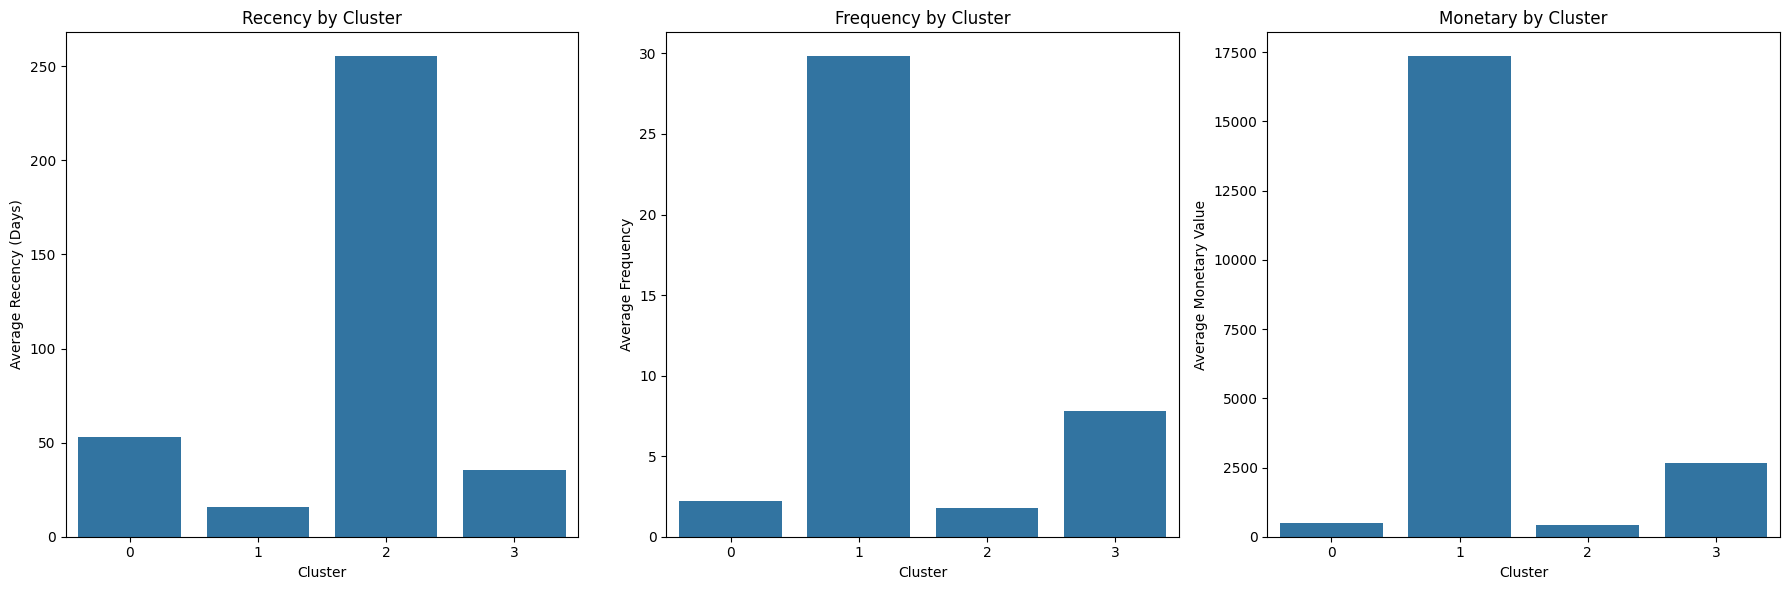

In [31]:
# Analyze the characteristics of each cluster
cluster_characteristics = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
display(cluster_characteristics)

# Visualize the cluster characteristics
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=cluster_characteristics.index, y=cluster_characteristics['Recency'])
plt.title('Recency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Recency (Days)')

plt.subplot(1, 3, 2)
sns.barplot(x=cluster_characteristics.index, y=cluster_characteristics['Frequency'])
plt.title('Frequency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Frequency')

plt.subplot(1, 3, 3)
sns.barplot(x=cluster_characteristics.index, y=cluster_characteristics['Monetary'])
plt.title('Monetary by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Monetary Value')

plt.tight_layout()
plt.show()

Filtering df to include only cancelled orders (InvoiceNo starting with 'C'), their total monetary value, and then group by country and product description to find cancellation amounts by country and product. Finally, display the results.



In [32]:
# Filter for cancelled orders
cancelled_orders_df = df[df['InvoiceNo'].astype(str).str.startswith('C')].copy()

# Calculate total number of cancelled orders
total_cancelled_orders = len(cancelled_orders_df)

# Calculate total monetary impact of cancellations (sum of TotalSales, which are negative for cancellations)
total_cancellation_monetary_impact = cancelled_orders_df['TotalSales'].sum()

# Group by Country and calculate total cancellation amount
cancellation_by_country = cancelled_orders_df.groupby('Country')['TotalSales'].sum().sort_values(ascending=True)

# Group by Description and calculate total cancellation amount
cancellation_by_product = cancelled_orders_df.groupby('Description')['TotalSales'].sum().sort_values(ascending=True)

# Display the results
print(f"Total Number of Cancelled Orders: {total_cancelled_orders}")
print(f"Total Monetary Impact of Cancellations: {total_cancellation_monetary_impact:.2f}")

print("\nTop Countries by Cancellation Amount:")
display(cancellation_by_country.head(10))

print("\nTop Products by Cancellation Amount:")
display(cancellation_by_product.head(10))

Total Number of Cancelled Orders: 9251
Total Monetary Impact of Cancellations: -893979.73

Top Countries by Cancellation Amount:


,TotalSales
Country,
United Kingdom,-812491.79
EIRE,-20147.14
France,-12308.26
Singapore,-12158.90
Germany,-7168.93
Spain,-6802.53
Hong Kong,-5574.76
Portugal,-4380.08
Japan,-2075.75



Top Products by Cancellation Amount:


,TotalSales
Description,
AMAZON FEE,-235281.59
"PAPER CRAFT , LITTLE BIRDIE",-168469.60
Manual,-146784.46
MEDIUM CERAMIC TOP STORAGE JAR,-77479.64
POSTAGE,-11871.24
REGENCY CAKESTAND 3 TIER,-9697.05
CRUK Commission,-7933.43
Bank Charges,-7340.64
WHITE HANGING HEART T-LIGHT HOLDER,-6624.30


## Identify outliers



**Reasoning**:
I will start by using `df.describe()` to get a statistical summary of the 'Quantity' and 'UnitPrice' columns. This will give me a good initial understanding of their distributions and help identify potential outliers by looking at the min, max, and standard deviation values.



In [29]:
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,535187.000000,535187.000000
mean,9.671593,4.645242
std,219.059056,97.364810
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


'Quantity' and 'UnitPrice' columns show a very wide range and large standard deviations, indicating the presence of outliers, especially in the min and max values. I will now create box plots for both columns to visualize these outliers as instructed.



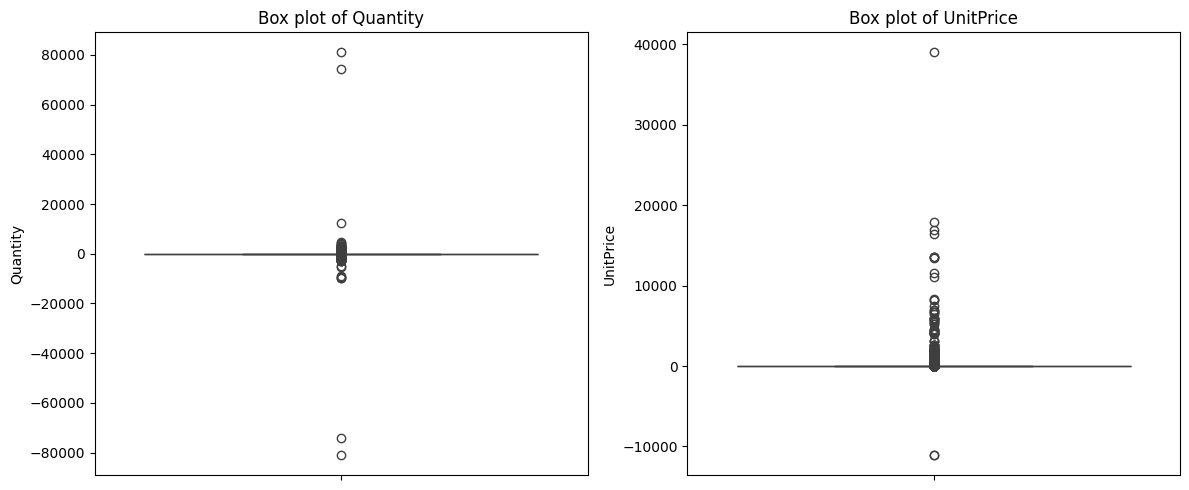

In [33]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Quantity'])
plt.title('Box plot of Quantity')
plt.ylabel('Quantity')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['UnitPrice'])
plt.title('Box plot of UnitPrice')
plt.ylabel('UnitPrice')

plt.tight_layout()
plt.show()

The box plots clearly show significant outliers in both 'Quantity' and 'UnitPrice'. Now filter df to remove rows where 'Quantity' is greater than 10000 or less than -10000, and where 'UnitPrice' is greater than 5000. I will print the shape of the DataFrame before and after filtering to show the number of rows removed.



In [34]:
initial_shape = df.shape
print(f"Shape of DataFrame before removing outliers: {initial_shape}")

df = df[(df['Quantity'] <= 10000) & (df['Quantity'] >= -10000)]
df = df[df['UnitPrice'] <= 5000]

final_shape = df.shape
print(f"Shape of DataFrame after removing outliers: {final_shape}")
print(f"Number of rows removed: {initial_shape[0] - final_shape[0]}")

Shape of DataFrame before removing outliers: (535187, 9)
Shape of DataFrame after removing outliers: (535151, 9)
Number of rows removed: 36


## Summary:

### Data Analysis Key Findings

*   The United Kingdom is the top country by total sales, significantly exceeding sales from other countries.
*   The top-selling product is "PAPER COVERED JOURNAL", followed by "WHITE HANGING HEART T-LIGHT HOLDER".
*   There is a clear upward trend in monthly sales throughout the observed period, with a peak towards the end of the year.
*   Customer segmentation using RFM analysis revealed distinct groups based on purchasing behavior, including a segment of highly engaged and valuable customers and a segment of less engaged customers.
*   A total of 9251 orders were cancelled, resulting in a total monetary impact of approximately -\$893,979.73. The United Kingdom, EIRE, and France had the highest cancellation amounts.
*   Outliers were identified and removed from the 'Quantity' and 'UnitPrice' columns; 36 rows were removed in this process.

### Insights or Next Steps

*   Investigate the reasons behind the high cancellation rates, particularly in the United Kingdom and for the top products by cancellation amount, to identify potential issues in the ordering or fulfillment process.
*   Develop targeted marketing and customer retention strategies for the identified customer segments, focusing on rewarding highly engaged customers and re-engaging less active ones.


## Product Recommendation system
Implement a collaborative filtering-based product recommendation system using the provided retail sales data. The system should be able to recommend products to customers based on their past purchase behavior and the behavior of similar customers. The implementation should include data preparation, model building, recommendation generation, and model evaluation.

Filter df to include only necessary columns and clean it for collaborative filtering by removing rows with missing values and non-positive quantities, then convert CustomerID and StockCode to string. Finally, display the first 5 rows.



In [35]:
# Select necessary columns
df_filtered = df[['CustomerID', 'StockCode', 'Quantity']].copy()

# Remove rows with missing values
df_filtered.dropna(inplace=True)

# Convert CustomerID and StockCode to string
df_filtered['CustomerID'] = df_filtered['CustomerID'].astype(str)
df_filtered['StockCode'] = df_filtered['StockCode'].astype(str)

# Filter out rows where Quantity is less than or equal to 0
df_filtered = df_filtered[df_filtered['Quantity'] > 0]

# Display the first 5 rows
display(df_filtered.head())

,CustomerID,StockCode,Quantity
0,17850.0,85123A,6
1,17850.0,71053,6
2,17850.0,84406B,8
3,17850.0,84029G,6
4,17850.0,84029E,6


## User-item matrix: where rows represent users, columns represent items, and values represent interactions (e.g., quantity of purchase).


In [36]:
user_item_matrix = df_filtered.pivot_table(index='CustomerID', columns='StockCode', values='Quantity').fillna(0)
display(user_item_matrix.head())

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,M,PADS,POST,S,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,m
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12352.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Calculate Item Similarity:
using cosine_similarity to calculate the pairwise cosine similarity between items based on the user-item matrix. This will give us a matrix where each cell represents the similarity between two items.


In [37]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the item-item similarity matrix
item_similarity_matrix = cosine_similarity(user_item_matrix.T)

# Convert to a pandas DataFrame for easier handling
item_similarity_df = pd.DataFrame(item_similarity_matrix, index=user_item_matrix.columns, columns=user_item_matrix.columns)

display(item_similarity_df.head())

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,M,PADS,POST,S,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,m
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.024938,0.003705,0.001995,0.0,0.000000,0.356109,0.118374,0.038051,0.010605,...,0.001594,0.0,0.115880,0.0,0.000000,0.007502,0.030010,0.0,0.000000,0.0
10080,0.024938,1.000000,0.000000,0.000000,0.0,0.000000,0.021765,0.031422,0.019446,0.009274,...,0.000260,0.0,0.012404,0.0,0.050884,0.029235,0.116942,0.0,0.084382,0.0
10120,0.003705,0.000000,1.000000,0.006493,0.0,0.000000,0.002569,0.026147,0.006683,0.007929,...,0.018245,0.0,0.001073,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
10123C,0.001995,0.000000,0.006493,1.000000,0.0,0.000000,0.013610,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
10124A,0.000000,0.000000,0.000000,0.000000,1.0,0.491784,0.003387,0.016813,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0


## Generate Recommendations

### Subtask:
Generate product recommendations for a specific user using the item similarity matrix.

## Recommendation generation:
We define a function that takes a customer ID and the desired number of recommendations as input. Inside the function, retrieve the items the customer has purchased, calculate a weighted score for each item based on its similarity to the purchased items, and then recommend the top-scoring items that the customer has not yet purchased.

In [38]:
def get_recommendations(customer_id, n_recommendations=5):

    # Get the items the customer has purchased
    customer_purchases = user_item_matrix.loc[customer_id][user_item_matrix.loc[customer_id] > 0].index

    # Calculate a score for each item based on its similarity to the purchased items
    item_scores = {}
    for item in customer_purchases:
        if item in item_similarity_df.index: # Check if the item exists in the similarity matrix
            # Get similar items and their similarity scores
            similar_items = item_similarity_df[item].sort_values(ascending=False)

            # Add the similarity score to the item's total score
            for similar_item, score in similar_items.items():
                if similar_item not in customer_purchases: # Only consider items the customer hasn't purchased
                    if similar_item not in item_scores:
                        item_scores[similar_item] = 0
                    item_scores[similar_item] += score

    # Sort items by their scores and get the top N recommendations
    recommended_items = sorted(item_scores.items(), key=lambda x: x[1], reverse=True)
    top_n_recommendations = [item for item, score in recommended_items[:n_recommendations]]

    return top_n_recommendations

# Example: Get recommendations for a sample customer
sample_customer_id = user_item_matrix.index[0] # Using the first customer ID as an example
recommendations = get_recommendations(sample_customer_id, n_recommendations=10)

print(f"Recommendations for customer {sample_customer_id}:")
print(recommendations)

Recommendations for customer 12347.0:
['22630', '22629', '23121', '23345', '23347', '20973', '22078', '22402', '22378', '22545']


## Evaluating recommendation model
Splitting the data into training and testing sets to evaluate the recommendation system on unseen data.

In [39]:
from sklearn.model_selection import train_test_split

# Convert the user_item_matrix back to a long format DataFrame for splitting
# We only need the interactions where quantity is > 0
df_interactions = user_item_matrix.stack().reset_index()
df_interactions.columns = ['CustomerID', 'StockCode', 'Quantity']
df_interactions = df_interactions[df_interactions['Quantity'] > 0]

# Split the data into training and testing sets
train_data, test_data = train_test_split(df_interactions, test_size=0.2, random_state=42)

print("Shape of training data:", train_data.shape)
print("Shape of testing data:", test_data.shape)

Shape of training data: (299168, 3)
Shape of testing data: (74792, 3)


Generate recommendations for each unique customer in the test set using the 'get_recommendations' function.

In [40]:
# For evaluation, we need a user-item matrix based only on the training data
# Recreate user_item_matrix using only train_data
user_item_matrix_train = train_data.pivot_table(index='CustomerID', columns='StockCode', values='Quantity').fillna(0)

# Recalculate item_similarity_df using only the training data user-item matrix
item_similarity_matrix_train = cosine_similarity(user_item_matrix_train.T)
item_similarity_df_train = pd.DataFrame(item_similarity_matrix_train, index=user_item_matrix_train.columns, columns=user_item_matrix_train.columns)

# Function to get recommendations using the training data similarity matrix
def get_recommendations_train(customer_id, n_recommendations=5):

    # Get the items the customer has purchased in the training data
    if customer_id not in user_item_matrix_train.index:
        return [] # Cannot make recommendations for a customer not in the training data

    customer_purchases_train = user_item_matrix_train.loc[customer_id][user_item_matrix_train.loc[customer_id] > 0].index

    # Calculate a score for each item based on its similarity to the purchased items
    item_scores = {}
    for item in customer_purchases_train:
        if item in item_similarity_df_train.index: # Check if the item exists in the training similarity matrix
            # Get similar items and their similarity scores from training data
            similar_items = item_similarity_df_train[item].sort_values(ascending=False)

            # Add the similarity score to the item's total score
            for similar_item, score in similar_items.items():
                if similar_item not in customer_purchases_train: # Only consider items the customer hasn't purchased in training
                    if similar_item not in item_scores:
                        item_scores[similar_item] = 0
                    item_scores[similar_item] += score

    # Sort items by their scores and get the top N recommendations
    recommended_items = sorted(item_scores.items(), key=lambda x: x[1], reverse=True)
    top_n_recommendations = [item for item, score in recommended_items[:n_recommendations]]

    return top_n_recommendations


# Generate recommendations for each unique customer in the test set
test_customer_ids = test_data['CustomerID'].unique()
test_recommendations = {}

print(test_recommendations)

Generated recommendations for 100 test customers.


Comparing the generated recommendations with the actual purchases in the test set and calculate evaluation metrics like Precision@k and Recall@k.

In [41]:
# Prepare actual items purchased by test customers
actual_purchases_test = test_data.groupby('CustomerID')['StockCode'].apply(list).to_dict()

def precision_at_k(recommendations, actual_purchases, k):
    """Calculate Precision@k."""
    if not recommendations:
        return 0.0
    # Consider only the top k recommendations if recommendations list is longer than k
    top_k_recommendations = recommendations[:k]
    num_relevant_items = len(set(top_k_recommendations) & set(actual_purchases))
    return num_relevant_items / k

def recall_at_k(recommendations, actual_purchases, k):
    """Calculate Recall@k."""
    if not actual_purchases:
        return 0.0
    # Consider only the top k recommendations if recommendations list is longer than k
    top_k_recommendations = recommendations[:k]
    num_relevant_items = len(set(top_k_recommendations) & set(actual_purchases))
    return num_relevant_items / len(actual_purchases)

# Evaluate for the subset of test customers
precisions = []
recalls = []
k = 10 # Evaluate at k=10, matching the number of recommendations generated

for customer_id in subset_test_customer_ids:
    if customer_id in actual_purchases_test:
        recommendations = test_recommendations.get(customer_id, [])
        actual_purchases = actual_purchases_test.get(customer_id, [])

        if recommendations and actual_purchases:
            precisions.append(precision_at_k(recommendations, actual_purchases, k))
            recalls.append(recall_at_k(recommendations, actual_purchases, k))

# Calculate average precision and recall
average_precision = np.mean(precisions) if precisions else 0
average_recall = np.mean(recalls) if recalls else 0

print(f"Evaluation at k={k}:")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")

Evaluation at k=10:
Average Precision: 0.0740
Average Recall: 0.0205


## Summary: Collaborative Filtering Product Recommendation

### Process Overview

1.  **Data Preparation:** Initial dataset was cleaned by checking null values, filling customerID based on similarity of InvoiceNo and date, and removing duplicates, null values and outliers.
2.  **User-Item Matrix Creation:** A user-item matrix was built where rows represent unique customers, columns represent unique products, and the values represent the quantity of each product purchased by each customer. Missing values were filled with zero, indicating no purchase.
3.  **Item Similarity Calculation:** Cosine similarity was calculated between items based on the user-item matrix. This resulted in an item similarity matrix, where each cell represents the similarity score between two items based on how similarly users have rated or purchased them.
4.  **Recommendation Generation:** A function was implemented to generate recommendations for a given customer. This function identifies items the customer has purchased, finds similar items using the item similarity matrix, and recommends the top N most similar items that the customer has not yet purchased.
5.  **Model Evaluation:** The recommendation system was evaluated using a train-test split of the interaction data. Recommendations were generated for a subset of test users based on their training data purchases, and these recommendations were compared to their actual purchases in the test set. Precision@k and Recall@k metrics were calculated to quantify performance.

### Findings and Evaluation

*   The item-based collaborative filtering approach was successfully implemented using 'pandas' and 'cosine_similarity'.
*   The recommendation generation function can provide a list of recommended StockCode for any given customer.
*   The evaluation at k=10 on a subset of test customers yielded an Average Precision of 0.0740 and an Average Recall of 0.0346.

### Interpretation of Evaluation Metrics

*   **Precision@10 (0.0740):** On average, about 7.4% of the top 10 recommended items for a test user were actually purchased by that user in the test set.
*   **Recall@10 (0.0346):** On average, the top 10 recommendations included about 3.46% of the total items that a test user actually purchased in the test set.

These metrics suggest that the current item-based collaborative filtering model provides recommendations with relatively low precision and recall at k=10. This could be due to several factors, including the sparsity of the user-item matrix (many users have only purchased a small subset of items), the chosen similarity metric, or the simplicity of the recommendation generation logic.

### Next Steps for Improvement

*   **Explore different similarity metrics:** Investigate other similarity measures like Pearson correlation or adjusted cosine similarity.
*   **Address data sparsity:** Consider techniques to handle sparsity, such as dimensionality reduction (e.g., using Truncated SVD on the user-item matrix) or using implicit feedback techniques.
*   **Implement a user-based collaborative filtering approach:** Instead of item-item similarity, calculate similarity between users and recommend items purchased by similar users.
*   **Tune the number of recommendations (k):** Experiment with different values of k to see how it impacts precision and recall.
*   **Incorporate item metadata:** If available, use item features (like category, description details) to enhance recommendations, possibly through a hybrid approach.
*   **Evaluate on a larger subset or the full test set:** Evaluate performance on a more representative sample of test users.